# SIGMOD2020 Programming Challenge

## Preprocessing datasets

Preprocessing the input datasets to reduce the amount of noise and increase the overlap.

In [1]:
import pandas as pd
import sys
import numpy as np
import os
import json
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

Extracting the unique strings in each dataset and building the pairwise matrices to plot a heatmap. 

In [2]:
# Read parsed datasets from the given directory. 
path = './datasets/'
df_names = os.listdir(path)
n_df = len(df_names)
uniques = {}

# Prepare the overlap matrices
common_mat = np.zeros((n_df, n_df))
norm_mat = np.zeros((n_df, n_df))

# Find the unique values in each dataset
print('{:<30}{:<10}'.format('Dataset', 'N. Columns'))
for i1, n1 in enumerate(df_names):
    df1 = pd.read_csv(path+n1, dtype='str')
    uniques[n1] = set(df1.values.ravel().tolist())
    print('{:<30}{:<10}'.format(n1, len(df1.columns)))

# Fill the matrices and print the number of columns found in the dataframe. 
for i1, n1 in enumerate(df_names):
    for i2, n2 in enumerate(df_names):
        if n1 == n2:
            continue
        commons = uniques[n1].intersection(uniques[n2])
        l_c = len(commons)
        l_c /= len(uniques[n2]) + len(uniques[n1])  # Normalize overlap by the total number of unique values (?)
        norm_mat[i1][i2] = l_c
        common_mat[i1][i2] = len(commons)
        

Dataset                       N. Columns
www.pricedekho.com.csv        105       
www.mypriceindia.com.csv      59        
www.shopmania.in.csv          81        
www.price-hunt.com.csv        169       
www.shopbot.com.au.csv        37        
www.cambuy.com.au.csv         647       
www.wexphotographic.com.csv   44        
cammarkt.com.csv              106       
www.walmart.com.csv           40        
www.gosale.com.csv            22        
www.pcconnection.com.csv      45        
www.flipkart.com.csv          211       
www.priceme.co.nz.csv         20        
www.eglobalcentral.co.uk.csv  330       
www.buzzillions.com.csv       260       
www.ebay.com.csv              2079      
www.ukdigitalcameras.co.uk.csv18        
www.henrys.com.csv            75        
www.alibaba.com.csv           1591      
www.ilgs.net.csv              200       
www.garricks.com.au.csv       16        
www.canon-europe.com.csv      92        
www.camerafarm.com.au.csv     284       
buy.net.csv     

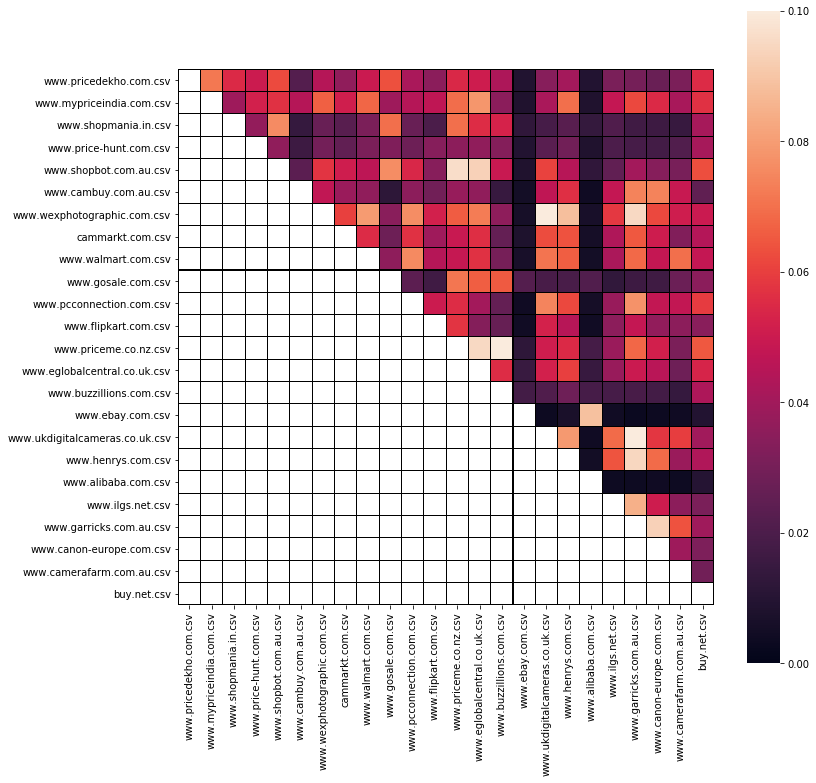

In [3]:
# Create mask for the heatmap
m = np.ones((n_df,n_df))
mask = np.tril(m)
figure = plt.figure(figsize=(12, 12))
sns.heatmap(norm_mat, annot=False, xticklabels=df_names, yticklabels=df_names, mask=mask, square=True, linewidths=0.01, linecolor='black', vmax=0.10)

The overlap is very low. Preprocessing to remove the columns that contain mostly null values. This drastically reduces the size of most tables. 

In [4]:
path = './datasets/'
c_path = './cleaned/'  # Save the new datasets in a new directory
df_names = os.listdir(path) 
n_df = len(df_names)
frac_valid = 0.5  # fraction of valid values (not null) required in a column to keep it

uniques = {}
valid_cols = {}
print('{:<30} {:>10} {:>10}'.format('Dataset', 'Total col', 'Valid col'))

for n1 in df_names:
    df = pd.read_csv(path+n1, dtype='str')
    n_valid = int(len(df)*frac_valid)
    counts = df.count()
    val = counts[counts>n_valid]
    valid_cols[n1] = list(val.keys())
    print('{:<30} {:>10} {:>10}'.format(n1, len(df.columns), len(valid_cols[n1])))
    df[list(val.keys())].set_index('index').sort_index().to_csv(c_path + n1)  # Saving the new dataset. 

Dataset                         Total col  Valid col
www.pricedekho.com.csv                105          7
www.mypriceindia.com.csv               59         32
www.shopmania.in.csv                   81         59
www.price-hunt.com.csv                169         44
www.shopbot.com.au.csv                 37          6
www.cambuy.com.au.csv                 647          9
www.wexphotographic.com.csv            44         42
cammarkt.com.csv                      106         23
www.walmart.com.csv                    40         14
www.gosale.com.csv                     22         11
www.pcconnection.com.csv               45         14
www.flipkart.com.csv                  211         21
www.priceme.co.nz.csv                  20         10
www.eglobalcentral.co.uk.csv          330          3
www.buzzillions.com.csv               260         19
www.ebay.com.csv                     2079         11
www.ukdigitalcameras.co.uk.csv         18         15
www.henrys.com.csv                     75     

In [6]:
# Simple function to clean some problematic cases.
def clean_dataset(df, frac_valid=0.5):
    n_valid = int(len(df)*frac_valid)
    counts = df.count()
    val = counts[counts > n_valid]  # find all the columns that contain enough not-null values
    valid_cols = list(val.keys())
    tmp = []
    for col in valid_cols:
        df[col] = df[col].str.replace('\n', ' ')
        if df[col].nunique() == 1:  # remove columns that contain only one value
            tmp.append(col)
    valid_cols = [_ for _ in valid_cols if _ not in tmp]
    return df[valid_cols]

In [9]:
path = './dataframes_bk/'  
c_path = './cleaned/'  # Save the new datasets in a new directory
df_names = os.listdir(path) 
n_df = len(df_names)
uniques = {}
valid_cols = {}

print('{:<30} {:>10} {:>10}'.format('Dataset', 'Total col', 'Valid col'))

for n1 in df_names:
    df = pd.read_csv(path+n1, dtype='str')
    df_cleaned = clean_dataset(df)    
    print('{:<30} {:>10} {:>10}'.format(n1, len(df.columns), len(df_cleaned.columns)))
    df_cleaned.set_index('index').sort_index().to_csv(c_path + n1)  # Saving the new dataset. 

Dataset                         Total col  Valid col
www.pricedekho.com.csv                105          6
www.mypriceindia.com.csv               59         32
www.shopmania.in.csv                   81         55
www.price-hunt.com.csv                169         43
www.shopbot.com.au.csv                 37          5
www.cambuy.com.au.csv                 647          9
www.wexphotographic.com.csv            44         34
cammarkt.com.csv                      106         22
www.walmart.com.csv                    40         13
www.gosale.com.csv                     22         11
www.pcconnection.com.csv               45         14
www.flipkart.com.csv                  211         21
www.priceme.co.nz.csv                  20          9
www.eglobalcentral.co.uk.csv          330          3
www.buzzillions.com.csv               260         14
www.ebay.com.csv                     2079         11
www.ukdigitalcameras.co.uk.csv         18         15
www.henrys.com.csv                     75     

In [10]:
# Trimming function: remove all words in line present in blacklist
def trim_blacklisted(line, blacklist, separator=' '):
    if len(blacklist) == 0:
        return line
    if type(line) == float:
        return line
    newline = []
    try:
        for _ in line.split(separator):
            if _ not in blacklist:
                newline.append(_)
        newline=set(newline)
        return separator.join(newline)
    except AttributeError:
        print(line)
        return line

In [11]:
# Remove long strings, unless they're in long_frequent
def handle_long_strings(line, long_frequent, separator=' ', sentence_len=20):
    if line in long_frequent:
        return line.replace(' ', '')
    try:
        s = line.split(' ')
        if len(s) > sentence_len:
            return ''
        else:
            return line
    except AttributeError:
        return line

In [12]:
upper_frac = 0.5  # blacklist values that appear in more than 
lower = 1
frequent = 10

path = './cleaned/'  # Read the datasets from the previous cleaning step
c_path = './cleanedv2/' # Save the new datasets in a new directory
df_names = os.listdir(path) 
n_df = len(df_names)

for n in df_names:
    print(n)
    df = pd.read_csv(path+n)
    for col in df.columns:
        if df[col].dtype == 'O':  
            uniq = set(df[col].values.ravel().tolist())
            counts = Counter(df[col])
            uf = [__ for _ in list(uniq) for __ in str(_).split(' ')]
            cu = Counter(uf)
            upper = int(upper_frac*len(df))
            long_frequent = [k for k, v in counts.items() if v > frequent and len(str(k).split(' ')) > 20]  # extract the frequent, long strings 
            blacklisted = [k for k, v in cu.items() if v > upper or v < lower] # extract the words to remove
            df[col] = df[col].apply(trim_blacklisted, blacklist=blacklisted, separator=' ') 
            df[col] = df[col].apply(handle_long_strings, long_frequent=long_frequent, separator=' ')
    df.to_csv(c_path + n)  # save the dataset

www.pricedekho.com.csv
www.mypriceindia.com.csv
www.shopmania.in.csv
www.price-hunt.com.csv
www.shopbot.com.au.csv
www.cambuy.com.au.csv
www.wexphotographic.com.csv
cammarkt.com.csv
www.walmart.com.csv
www.gosale.com.csv
www.pcconnection.com.csv
www.flipkart.com.csv
www.priceme.co.nz.csv
www.eglobalcentral.co.uk.csv
www.buzzillions.com.csv
www.ebay.com.csv
www.ukdigitalcameras.co.uk.csv
www.henrys.com.csv
www.alibaba.com.csv
www.ilgs.net.csv
www.garricks.com.au.csv
www.canon-europe.com.csv
www.camerafarm.com.au.csv
buy.net.csv


In [151]:
df = pd.read_csv('./cleaned/www.shopbot.com.au.csv')
col = '<page title>'
uniq = set(df[col].values.ravel().tolist())
uf = [__ for _ in list(uniq) for __ in str(_).split(' ')]
cf = Counter(uf)
upper = int(0.5*len(df))
blacklisted = [k for k, v in cf.items() if v > upper or v < lower]
print(blacklisted)
frequent = 10
counts = Counter(df[col])
long_frequent = [k for k, v in counts.items() if v > frequent and len(str(k).split(' ')) > 20]
print(long_frequent)

['-', 'Price', 'comparison', '&', 'reviews', 'Digital', 'Cameras', 'Australia']
[]


# TESTING CLEANUP

Expanding each string to find the unique number of words (rather than tokens) in each dataset. 

In [13]:
path = './cleaned/' 

uniques = {}
flat_uniques = {}
for n1 in df_names:
    df = pd.read_csv(path+n1, dtype='str')
    uniques[n1] = set(df.values.ravel().tolist())
    flat_uniques[n1] = set([_1 for _2 in uniques[n1] for _1 in str(_2).split(' ') ])

In [14]:
path = './cleanedv2/' 

uniquesv2 = {}
flat_uniquesv2 = {}
for n1 in df_names:
    df = pd.read_csv(path+n1, dtype='str')
    uniquesv2[n1] = set(df.values.ravel().tolist())
    flat_uniquesv2[n1] = set([_1 for _2 in uniquesv2[n1] for _1 in str(_2).split(' ') ])

In [153]:
path = './cleanedv3/' 

uniquesv3 = {}
flat_uniquesv3 = {}
for n1 in df_names:
    df = pd.read_csv(path+n1, dtype='str')
    uniquesv3[n1] = set(df.values.ravel().tolist())
    flat_uniquesv3[n1] = set([_1 for _2 in uniquesv3[n1] for _1 in str(_2).split(' ') ])

In [15]:
print('{:<30} {:>15} {:>15} {:>15} {:>15} {:>15} {:>15}'.format('Dataset', 'Unique', 'Unique v2', 'diff', 'F. Unique', 'F. Unique v2', 'diff'))
for n1 in df_names:
    print('{:<30} {:>15} {:>15} {:>15} {:>15} {:>15} {:>15} '.format(n1, len(uniques[n1]), len(uniquesv2[n1]), len(uniquesv2[n1]) - len(uniques[n1]), 
                                                       len(flat_uniques[n1]), len(flat_uniquesv2[n1]), len(flat_uniquesv2[n1]) - len(flat_uniques[n1])))

Dataset                                 Unique       Unique v2            diff       F. Unique    F. Unique v2            diff
www.pricedekho.com.csv                    1206            1141             -65            3206            1232           -1974 
www.mypriceindia.com.csv                  3073            2872            -201            4300            3290           -1010 
www.shopmania.in.csv                      7511            7267            -244           16878           10923           -5955 
www.price-hunt.com.csv                    4531            4040            -491            8503            4369           -4134 
www.shopbot.com.au.csv                    1553            1553               0            1487            1479              -8 
www.cambuy.com.au.csv                      556             512             -44            1186             886            -300 
www.wexphotographic.com.csv               1129            1132               3            1487           

In [16]:
%%time
path = './cleaned/' 
flat_norm_mat = np.zeros((n_df, n_df))
for i1, n1 in enumerate(df_names):
    df1 = pd.read_csv(path+n1, dtype='str')
    for i2, n2 in enumerate(df_names):
        if n1 == n2:
            continue
        df2 = pd.read_csv(path+n2, dtype='str')
        commons = flat_uniques[n1].intersection(flat_uniques[n2])
        l_c = len(commons)
        l_c /= len(flat_uniques[n2]) + len(flat_uniques[n1])
        flat_norm_mat[i1][i2] = l_c
        
tups = []
for i1, n1 in enumerate(df_names):
    for i2, n2 in enumerate(df_names[i1:], start=i1):
        t = (n1, n2, flat_norm_mat[i1][i2])
        tups.append(t)

tups = [_ for _ in tups if _[2] > 0]

tups_sorted = sorted(tups, key=lambda x: x[2], reverse=True)

for _ in tups_sorted[:20]:
    print('{:>30} {:>30} {:10.3f}'.format(*_))

flatmapv1 = flat_norm_mat

        www.shopbot.com.au.csv   www.eglobalcentral.co.uk.csv      0.242
        www.shopbot.com.au.csv          www.priceme.co.nz.csv      0.204
         www.priceme.co.nz.csv        www.buzzillions.com.csv      0.194
         www.priceme.co.nz.csv   www.eglobalcentral.co.uk.csv      0.192
        www.pricedekho.com.csv       www.mypriceindia.com.csv      0.184
         www.cambuy.com.au.csv        www.garricks.com.au.csv      0.179
www.ukdigitalcameras.co.uk.csv        www.garricks.com.au.csv      0.175
      www.mypriceindia.com.csv         www.price-hunt.com.csv      0.167
        www.pricedekho.com.csv         www.price-hunt.com.csv      0.166
  www.eglobalcentral.co.uk.csv        www.garricks.com.au.csv      0.148
         www.cambuy.com.au.csv    www.wexphotographic.com.csv      0.146
              www.ebay.com.csv            www.alibaba.com.csv      0.145
      www.mypriceindia.com.csv             www.henrys.com.csv      0.144
   www.wexphotographic.com.csv             www.henr

        www.shopbot.com.au.csv   www.eglobalcentral.co.uk.csv      0.241
        www.pricedekho.com.csv         www.shopbot.com.au.csv      0.217
         www.cambuy.com.au.csv        www.garricks.com.au.csv      0.210
        www.shopbot.com.au.csv          www.priceme.co.nz.csv      0.205
         www.priceme.co.nz.csv        www.buzzillions.com.csv      0.195
      www.mypriceindia.com.csv         www.price-hunt.com.csv      0.195
         www.priceme.co.nz.csv   www.eglobalcentral.co.uk.csv      0.192
www.ukdigitalcameras.co.uk.csv        www.garricks.com.au.csv      0.175
        www.pricedekho.com.csv   www.eglobalcentral.co.uk.csv      0.168
         www.cambuy.com.au.csv    www.wexphotographic.com.csv      0.158
        www.pricedekho.com.csv          www.priceme.co.nz.csv      0.158
      www.mypriceindia.com.csv             www.henrys.com.csv      0.152
      www.mypriceindia.com.csv   www.eglobalcentral.co.uk.csv      0.150
  www.eglobalcentral.co.uk.csv        www.garricks.

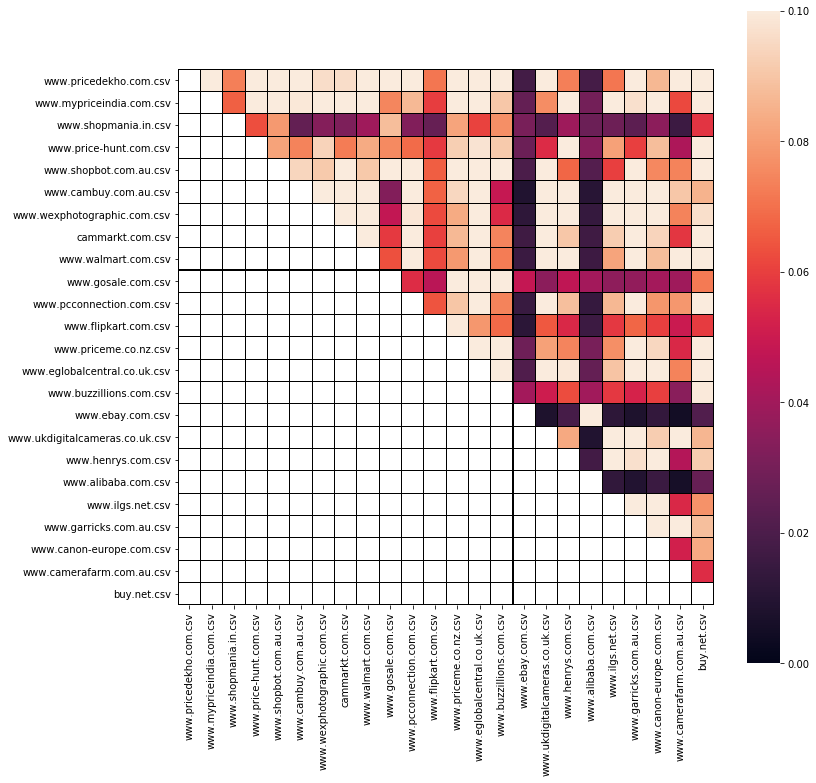

In [17]:
%%time
path = './cleanedv2/' 
flat_norm_mat = np.zeros((n_df, n_df))
for i1, n1 in enumerate(df_names):
    df1 = pd.read_csv(path+n1, dtype='str')
    for i2, n2 in enumerate(df_names):
        if n1 == n2:
            continue
        df2 = pd.read_csv(path+n2, dtype='str')
        commons = flat_uniquesv2[n1].intersection(flat_uniquesv2[n2])
        l_c = len(commons)
        l_c /= len(flat_uniquesv2[n2]) + len(flat_uniquesv2[n1])
        flat_norm_mat[i1][i2] = l_c
        

figure = plt.figure(figsize=(12,12))
sns.heatmap(flat_norm_mat, annot=False, xticklabels=df_names, yticklabels=df_names, mask=mask, square=True, linewidths=0.01, linecolor='black', vmax=0.10)

tups = []
for i1, n1 in enumerate(df_names):
    for i2, n2 in enumerate(df_names[i1:], start=i1):
        t = (n1, n2, flat_norm_mat[i1][i2])
        tups.append(t)

tups = [_ for _ in tups if _[2] > 0]

tups_sorted = sorted(tups, key=lambda x: x[2], reverse=True)

for _ in tups_sorted[:20]:
    print('{:>30} {:>30} {:10.3f}'.format(*_))
flatmapv2 = flat_norm_mat

In [134]:
%%time
path = './dataframes/' 
flat_norm_mat = np.zeros((n_df, n_df))
for i1, n1 in enumerate(df_names):
    df1 = pd.read_csv(path+n1, dtype='str')
    for i2, n2 in enumerate(df_names):
        if n1 == n2:
            continue
        df2 = pd.read_csv(path+n2, dtype='str')
        commons = flat_uniques[n1].intersection(flat_uniques[n2])
        l_c = len(commons)
        l_c /= len(flat_uniques[n2]) + len(flat_uniques[n1])
        flat_norm_mat[i1][i2] = l_c
        

figure = plt.figure(figsize=(12,12))
sns.heatmap(flat_norm_mat, annot=False, xticklabels=df_names, yticklabels=df_names, mask=mask, square=True, linewidths=0.01, linecolor='black', vmax=0.10)

tups = []
for i1, n1 in enumerate(df_names):
    for i2, n2 in enumerate(df_names[i1:], start=i1):
        t = (n1, n2, flat_norm_mat[i1][i2])
        tups.append(t)

tups = [_ for _ in tups if _[2] > 0]

tups_sorted = sorted(tups, key=lambda x: x[2], reverse=True)

for _ in tups_sorted[:20]:
    print('{:>30} {:>30} {:10.3f}'.format(*_))

flatmap = flat_norm_mat

In [11]:
# Create mask for the heatmap
m = np.ones((n_df,n_df))
mask = np.tril(m)

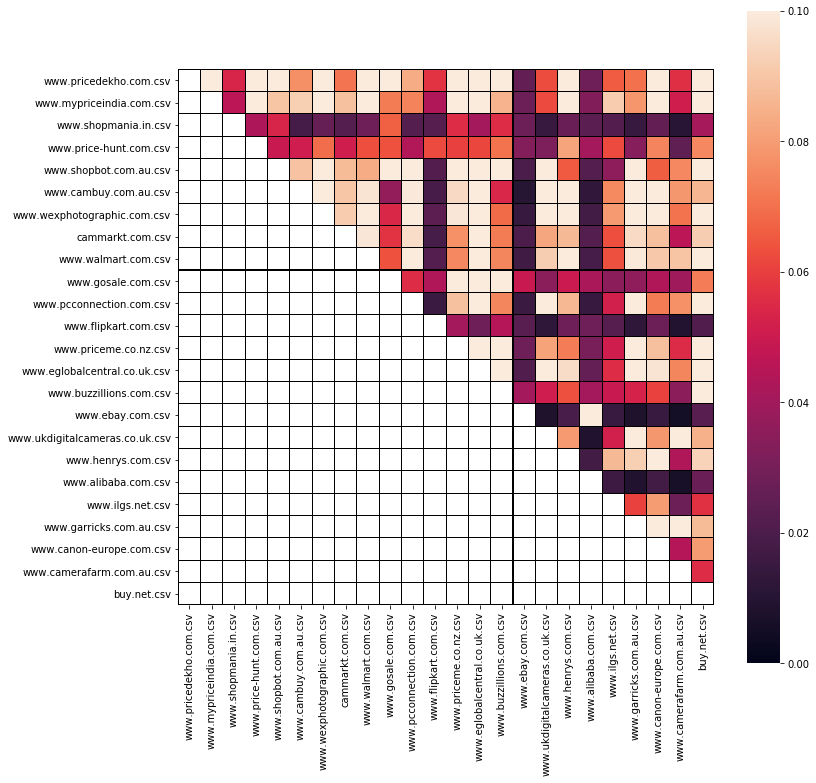

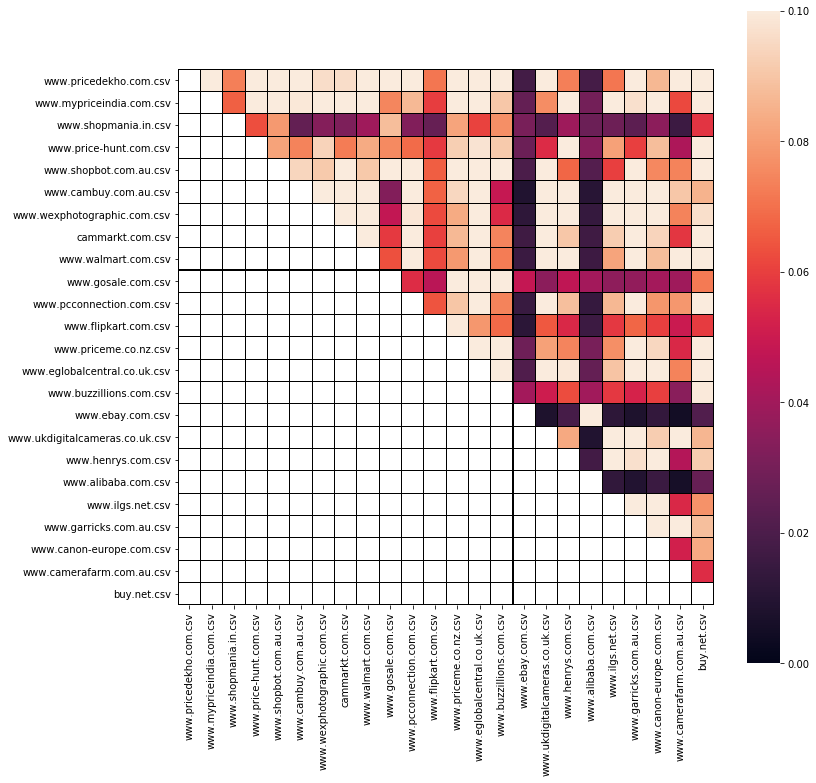

In [18]:
figure = plt.figure(figsize=(12,12))
sns.heatmap(flatmapv1, annot=False, xticklabels=df_names, yticklabels=df_names, mask=mask, square=True, linewidths=0.01, linecolor='black', vmax=0.10)
figure = plt.figure(figsize=(12,12))
sns.heatmap(flatmapv2, annot=False, xticklabels=df_names, yticklabels=df_names, mask=mask, square=True, linewidths=0.01, linecolor='black', vmax=0.10)

The heatmap below shows the gain in overlap between the different datasets using the two different cleaning strategies. 

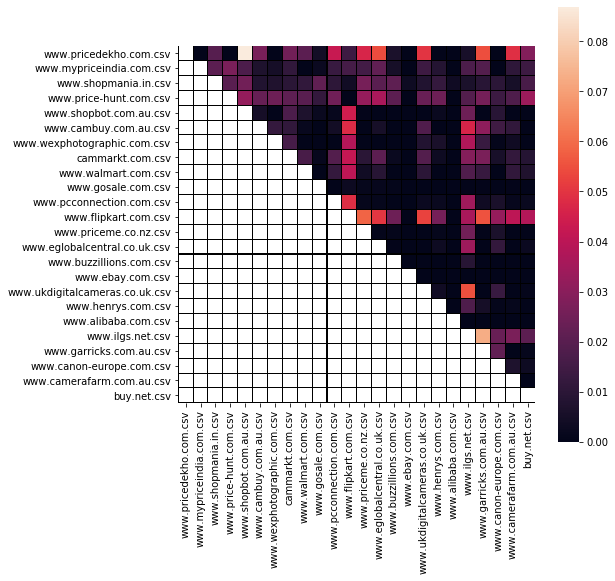

In [21]:
figure = plt.figure(figsize=(8, 8))
sns.heatmap(flatmapv2-flatmapv1, annot=False, xticklabels=df_names, yticklabels=df_names, mask=mask, square=True, linewidths=0.01, linecolor='black', vmin=0)